# Scan analysis

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [2]:
import pandas as pd

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


from plots2.fns import (
    standard_layout,
    corner_annotations_colwise,
    corner_annotations_rowwise,
    get_text_annotation
)

from poly2.utils import get_dispersal_kernel, trait_vec, beta_dist, gamma_dist
from poly2.run import no_joblib_single_run, no_joblib_multiple_run
from poly2.config import Config, ConfigMixture, get_asymptote_config
from poly2.simulator import SimulatorOneTrait, SimulatorAsymptote

## Conclusions:

For low dose:
- high curvature good
- high b good
- think want high mu

Need to be careful that curvature not so high that it stays too flat initially, or that dose response looks silly 

Something like this looks decent:

```
cf = get_asymptote_config(
    verbose=False,
    n_k=100,
    n_years=30,              
    k_mu=0.96,
    k_b=2,
    curvature=20
)
```



Next steps:

- try fitting to Frank data (quickly)
- see what that model does, if crap then try custom parameters to demonstrate effect
- hope for something which fairly consistently gives high doses best
- probably show that range of outcomes possible again

In [40]:
# bp = {'mu': 0.7537152707909325,
#  'b': 3.9310391352531706,
#  'curvature': 13.1161191359555}

bp = {'mu': 0.65,
 'b': 10,
 'curvature': 20}


cf = get_asymptote_config(
    verbose=False,
    n_k=100,
    n_years=30,              
    # k_mu=0.69,
    # k_b=5.809197500657343,
    # curvature=18.328287366983332
    k_mu=bp['mu'],
    k_b=bp['b'],
    curvature=bp['curvature'],
)

cf.print_repr()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
asymptote = None
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
curvature = 20
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
k_b = 10
k_mu = 0.65
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
n_k = 100
n_years = 30
sprays = None



In [41]:
s = SimulatorAsymptote(cf)

In [42]:
data_list = []

doses = np.linspace(0,1,5)[1:]

for dose in doses:
    cf.doses = np.ones(cf.n_years)*dose
    data = s.run_model()
    data_list.append(data)

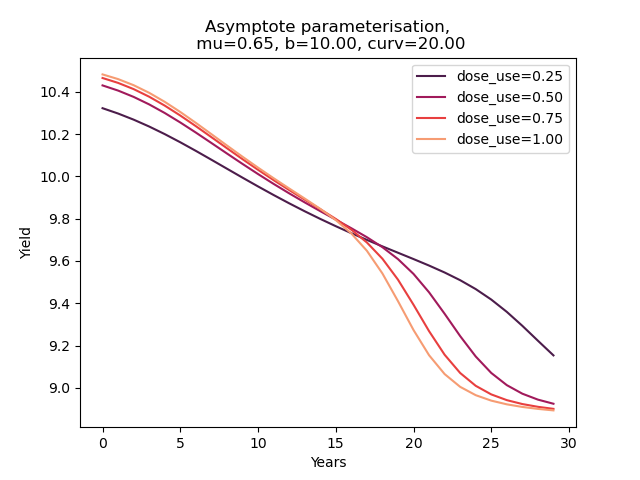

In [43]:
f, ax = plt.subplots()

sns.set_palette('rocket', n_colors=4)

for ind, dd in enumerate(data_list):
    dose_use = doses[ind]
    
    ax.plot(dd['yield_vec'], label=f'{dose_use=:.2f}')

    
ax.set_title(f'Asymptote parameterisation,\n mu={bp["mu"]:.2f}, b={bp["b"]:.2f}, curv={bp["curvature"]:.2f}')

ax.set_xlabel('Years')
ax.set_ylabel('Yield')

ax.legend()

In [44]:
f.savefig('../figures/rough/asympt.jpg')

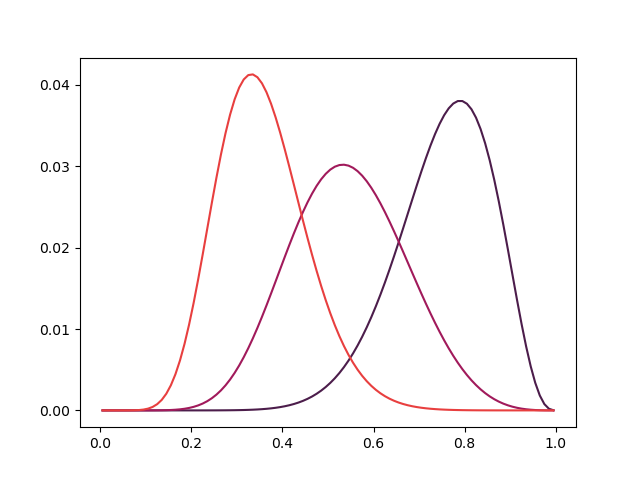

In [28]:
f, ax = plt.subplots()

for ii in range(0, 15, 5):
    ax.plot(data_list[0]['k_vec'], data_list[0]['fung_dists'][:, ii])